In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.express as px
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
import matplotlib.pyplot as plt

Dataset para descargar:
https://mega.nz/file/SRBmhYyK#euequA-ET5EiqscPP7XoH_S7LXNwESWINT-D92nlEt4

### Para cargar el Dataset por medio de PC (Opcional)

In [ ]:
from google.colab import files
import chardet

# Subir archivo
uploaded = files.upload()
filename = next(iter(uploaded))

# Detectar la codificación del archivo
with open(filename, 'rb') as file:
    result = chardet.detect(file.read(10000))  # Puedes ajustar el número de bytes si es necesario

# Crear un DataFrame a partir del archivo CSV con la codificación detectada
datos = pd.read_csv(filename, encoding=result['encoding'])

Saving sales_data_sample.csv to sales_data_sample (6).csv


### Para cargar el Dataset por Google **drive** (Opcional)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Carga de datos
#datos = pd.read_csv('/content/drive/My Drive/Programacion/Marketing/sales_data_sample.csv', encoding = 'unicode_escape')

In [ ]:
# Vista de datos
datos.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
# Obtener información básica del dataset
print(datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
# Convertir la fecha del pedido en formato de fecha y hora
datos['ORDERDATE'] = pd.to_datetime(datos['ORDERDATE'])
# (MSRP) es el precio minorista sugerido por el fabricante (MSRP) o el precio de etiqueta representa el precio minorista sugerido de los productos
# El MSRP se utiliza para estandarizar el precio de los productos en varias ubicaciones de tiendas de la empresa
# Comprobar el tipo de datos
datos.dtypes

ORDERNUMBER                  int64
QUANTITYORDERED              int64
PRICEEACH                  float64
ORDERLINENUMBER              int64
SALES                      float64
ORDERDATE           datetime64[ns]
STATUS                      object
QTR_ID                       int64
MONTH_ID                     int64
YEAR_ID                      int64
PRODUCTLINE                 object
MSRP                         int64
PRODUCTCODE                 object
CUSTOMERNAME                object
PHONE                       object
ADDRESSLINE1                object
ADDRESSLINE2                object
CITY                        object
STATE                       object
POSTALCODE                  object
COUNTRY                     object
TERRITORY                   object
CONTACTLASTNAME             object
CONTACTFIRSTNAME            object
DEALSIZE                    object
dtype: object

In [ ]:
# Verificar valores faltantes
print(datos.isnull().sum())

# Imputar o eliminar valores faltantes
# datos.fillna(valor, inplace=True) o datos.dropna(inplace=True) (Optativo)

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [ ]:
datos.fillna('ADDRESSLINE2', inplace=True)

In [ ]:
# Verificar de nuevo si existe elementos nulos
datos.isnull().sum()

ORDERNUMBER         0
QUANTITYORDERED     0
PRICEEACH           0
ORDERLINENUMBER     0
SALES               0
ORDERDATE           0
STATUS              0
QTR_ID              0
MONTH_ID            0
YEAR_ID             0
PRODUCTLINE         0
MSRP                0
PRODUCTCODE         0
CUSTOMERNAME        0
PHONE               0
ADDRESSLINE1        0
ADDRESSLINE2        0
CITY                0
STATE               0
POSTALCODE          0
COUNTRY             0
TERRITORY           0
CONTACTLASTNAME     0
CONTACTFIRSTNAME    0
DEALSIZE            0
dtype: int64

Análisis Exploratorio de Datos (EDA)

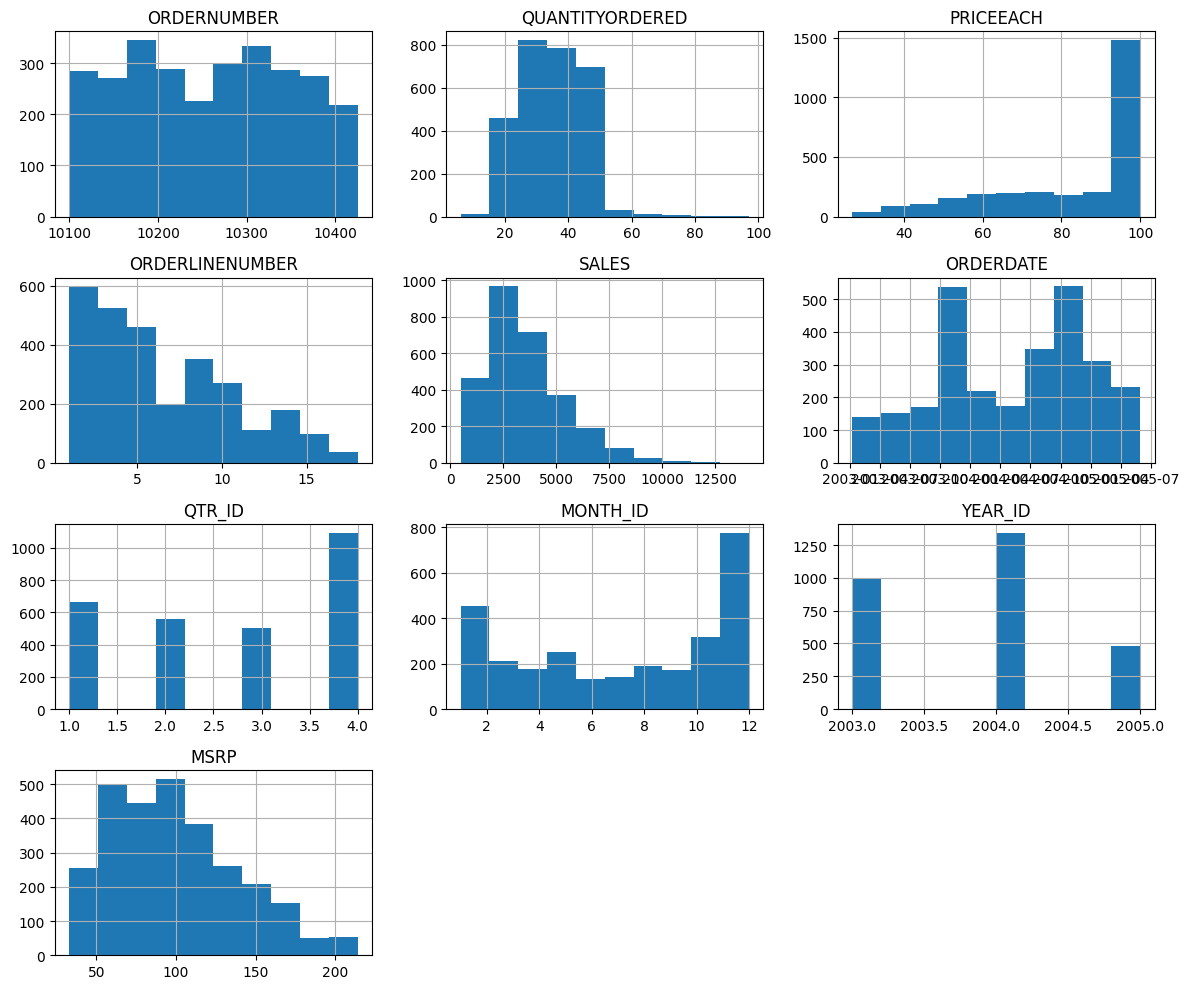

In [ ]:
# Histogramas para visualizar distribuciones
datos.hist(figsize=(12, 10))
plt.tight_layout()  # Ajusta el espacio entre los subplots
plt.show()

In [ ]:
# Analizando la columna "COUNTRY"
pais_counts = datos['COUNTRY'].value_counts()
pais_labels = pais_counts.index
pais_values = pais_counts.values

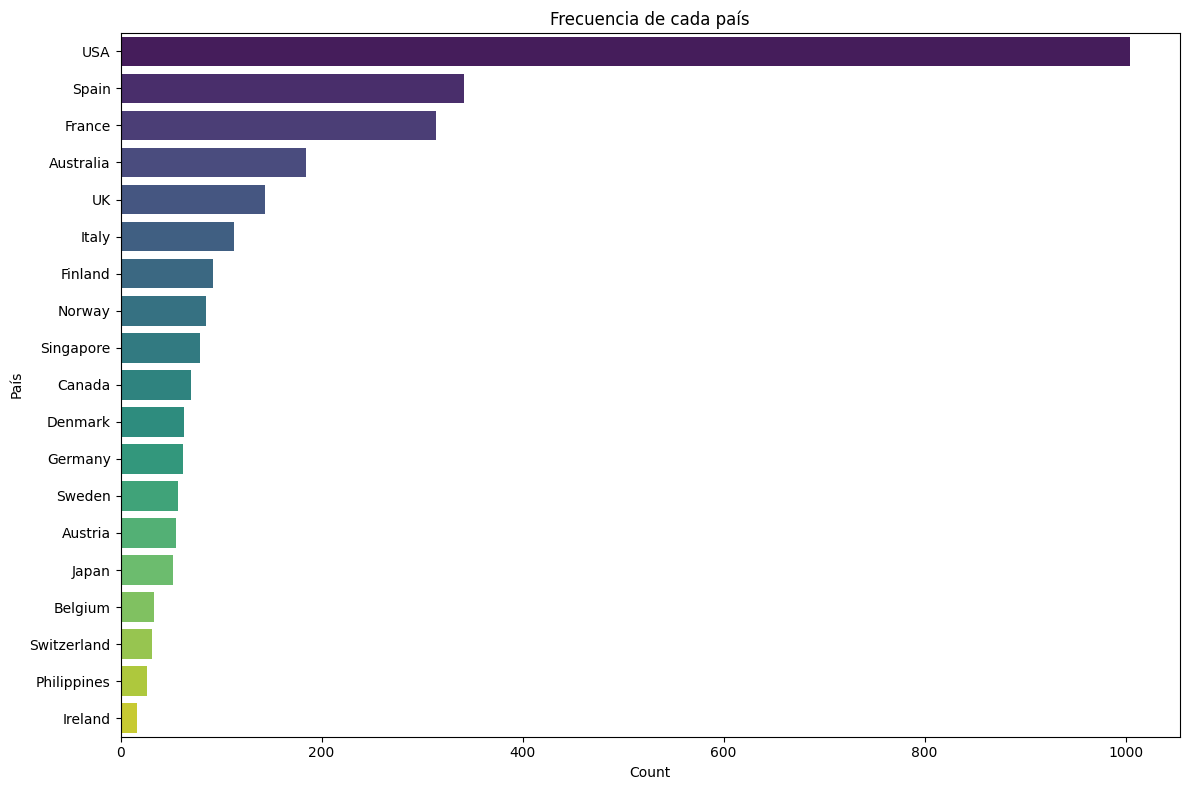

In [ ]:
# Se muetra el resultado por medio del grafico seleccionado
plt.figure(figsize=(12, 8))
sns.barplot(x=pais_values, y=pais_labels, palette='viridis')
plt.xlabel('Count')
plt.ylabel('País')
plt.title('Frecuencia de cada país')
plt.tight_layout()
plt.show()

In [ ]:
# Permite visualizar la tabla de forma completa (Optativo)
pd.set_option('display.max_columns', None)

In [ ]:
datos.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,ADDRESSLINE2,NYC,NY,10022,USA,ADDRESSLINE2,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,ADDRESSLINE2,Reims,ADDRESSLINE2,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,ADDRESSLINE2,Paris,ADDRESSLINE2,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,ADDRESSLINE2,Pasadena,CA,90003,USA,ADDRESSLINE2,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,ADDRESSLINE2,San Francisco,CA,ADDRESSLINE2,USA,ADDRESSLINE2,Brown,Julie,Medium


In [ ]:
# Quitando columnas consideradas innecesarias
threshold = 0.7  # por ejemplo, si más del 70% de los valores están faltantes
cols_with_missing_values = datos.columns[datos.isnull().mean() > threshold]
cols_with_single_value = datos.columns[datos.nunique() <= 1]
cols_redundant = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'ORDERNUMBER', 'ADDRESSLINE1', 'CONTACTLASTNAME', 'DEALSIZE', 'CUSTOMERNAME', 'PHONE', 'CITY']  # lista de columnas innecesarias

In [ ]:
# Supongamos que cols_to_drop es una lista de las columnas que deseas eliminar
cols_to_drop = list(cols_with_missing_values) + list(cols_with_single_value) + cols_redundant
datos = datos.drop(columns=cols_to_drop)

In [ ]:
datos.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,CONTACTFIRSTNAME
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,S10_1678,USA,Kwai
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,S10_1678,France,Paul
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,S10_1678,France,Daniel
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,S10_1678,USA,Julie
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,S10_1678,USA,Julie


In [ ]:
# Función para agregar variables ficticias para reemplazar variables categóricas
def dummies(x):
    if x not in datos.columns:
        raise ValueError(f"'{x}' no se encuentra en las columnas del DataFrame")

    return pd.get_dummies(datos, columns=[x], drop_first=False, prefix='', prefix_sep='')

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITYORDERED   2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINENUMBER   2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   STATUS            2823 non-null   object        
 6   QTR_ID            2823 non-null   int64         
 7   MONTH_ID          2823 non-null   int64         
 8   YEAR_ID           2823 non-null   int64         
 9   PRODUCTLINE       2823 non-null   object        
 10  MSRP              2823 non-null   int64         
 11  PRODUCTCODE       2823 non-null   object        
 12  COUNTRY           2823 non-null   object        
 13  CONTACTFIRSTNAME  2823 non-null   object        
dtypes: datetime64[ns](1), fl

In [ ]:
columnas_a_convertir = ['COUNTRY', 'STATUS', 'PRODUCTLINE', 'CONTACTFIRSTNAME', ]
datos_dummies = pd.get_dummies(datos, columns=columnas_a_convertir, drop_first=False)

In [ ]:
print(datos_dummies.head())

   QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE  QTR_ID  \
0               30      95.70                2  2871.00 2003-02-24       1   
1               34      81.35                5  2765.90 2003-05-07       2   
2               41      94.74                2  3884.34 2003-07-01       3   
3               45      83.26                6  3746.70 2003-08-25       3   
4               49     100.00               14  5205.27 2003-10-10       4   

   MONTH_ID  YEAR_ID  MSRP PRODUCTCODE  COUNTRY_Australia  COUNTRY_Austria  \
0         2     2003    95    S10_1678                  0                0   
1         5     2003    95    S10_1678                  0                0   
2         7     2003    95    S10_1678                  0                0   
3         8     2003    95    S10_1678                  0                0   
4        10     2003    95    S10_1678                  0                0   

   COUNTRY_Belgium  COUNTRY_Canada  COUNTRY_Denmark  COUNTRY_F

In [ ]:
# Nivel Categórico para "PRODUCTCODE"
y = pd.factorize(datos['PRODUCTCODE'])[0]

In [ ]:
y

array([  0,   0,   0, ..., 108, 108, 108])

In [ ]:
# Con este codigo se evita la dimensionalidad
datos['PRODUCTCODE'] = pd.factorize(datos['PRODUCTCODE'])[0]

In [ ]:
datos

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,COUNTRY,CONTACTFIRSTNAME
0,30,95.70,2,2871.00,2003-02-24,Shipped,1,2,2003,Motorcycles,95,0,USA,Kwai
1,34,81.35,5,2765.90,2003-05-07,Shipped,2,5,2003,Motorcycles,95,0,France,Paul
2,41,94.74,2,3884.34,2003-07-01,Shipped,3,7,2003,Motorcycles,95,0,France,Daniel
3,45,83.26,6,3746.70,2003-08-25,Shipped,3,8,2003,Motorcycles,95,0,USA,Julie
4,49,100.00,14,5205.27,2003-10-10,Shipped,4,10,2003,Motorcycles,95,0,USA,Julie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,2004-12-02,Shipped,4,12,2004,Ships,54,108,Spain,Diego
2819,29,100.00,1,3978.51,2005-01-31,Shipped,1,1,2005,Ships,54,108,Finland,Pirkko
2820,43,100.00,4,5417.57,2005-03-01,Resolved,1,3,2005,Ships,54,108,Spain,Diego
2821,34,62.24,1,2116.16,2005-03-28,Shipped,1,3,2005,Ships,54,108,France,Annette


In [ ]:
# Agrupar y ordenar datos
datos_group = datos.groupby("ORDERDATE")[["SALES", "QUANTITYORDERED"]].sum()

In [ ]:
datos['ORDERDATE'] = pd.to_datetime(datos['ORDERDATE'])
datos_group = datos.groupby("ORDERDATE").sum().sort_index()

<ipython-input-42-726baed09e42>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  datos_group = datos.groupby("ORDERDATE").sum().sort_index()


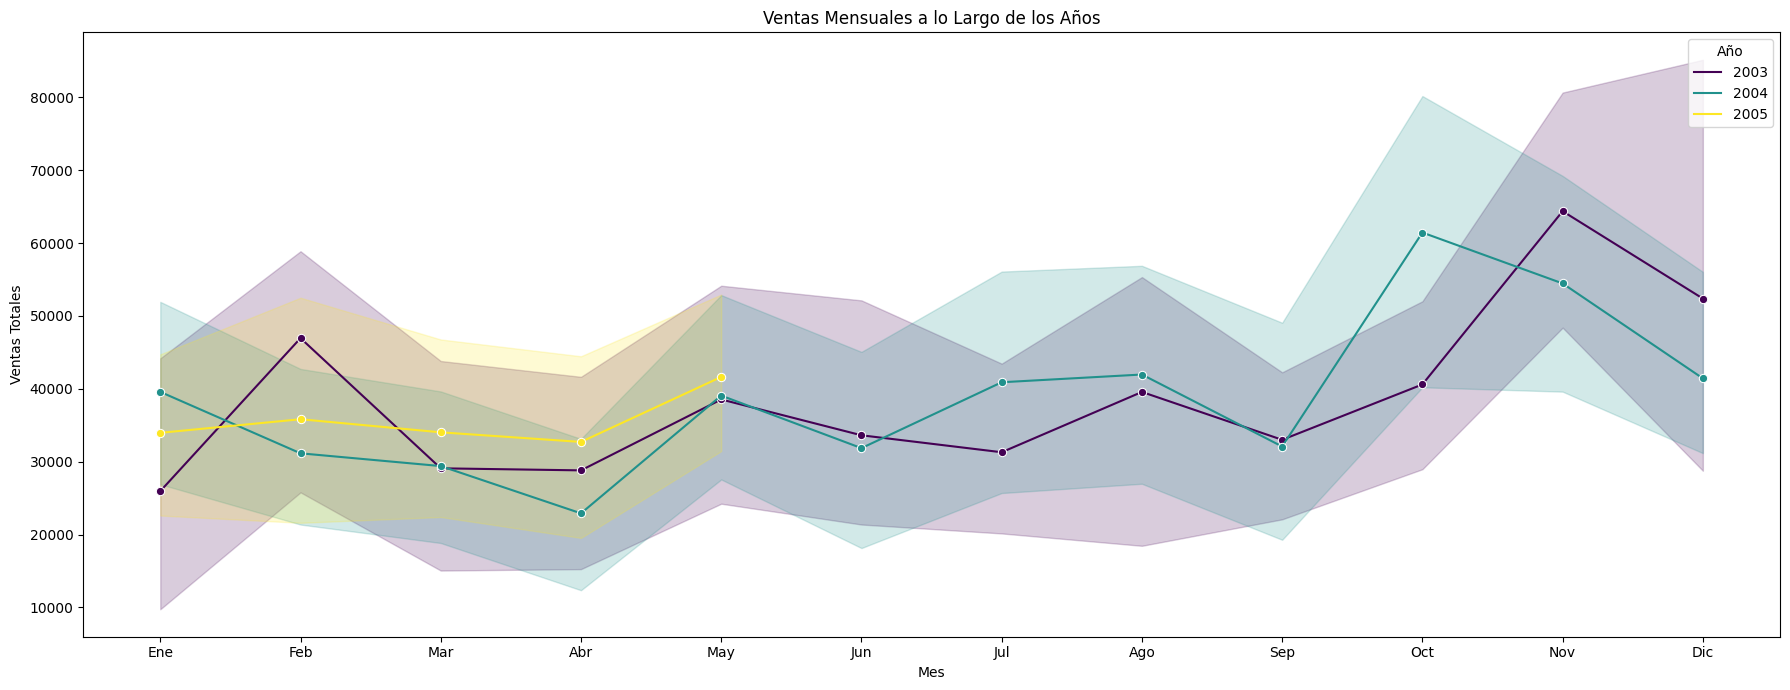

In [ ]:
# Mostrar graficamente
datos_group['Year'] = datos_group.index.year
datos_group['Month'] = datos_group.index.month

plt.figure(figsize=(18, 7))
sns.lineplot(x='Month', y='SALES', hue='Year', data=datos_group, palette='viridis', marker='o')
plt.title('Ventas Mensuales a lo Largo de los Años')
plt.xlabel('Mes')
plt.ylabel('Ventas Totales')
plt.legend(title='Año')
plt.xticks(ticks=range(1, 13), labels=['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.tight_layout()
plt.show()

In [ ]:
# '.corr()' de pandas para calcular la matriz de correlación
# Selecciona solo columnas numéricas
datos_group_numeric = datos_group.select_dtypes(include=['float64', 'int64'])

# Calcula la matriz de correlación
correlation_matrix = datos_group_numeric.corr()

In [ ]:
print(datos_group.head())

            QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  QTR_ID  \
ORDERDATE                                                                   
2003-01-06              151     288.78               10  12133.25       4   
2003-01-09              142     284.96               10  11432.34       4   
2003-01-10               80     150.14                3   6864.05       2   
2003-01-29              541    1417.54              136  54702.00      16   
2003-01-31              443    1061.89               91  44621.96      13   

            MONTH_ID  YEAR_ID  MSRP  PRODUCTCODE  Year  Month  
ORDERDATE                                                      
2003-01-06         4     8012   363          174  2003      1  
2003-01-09         4     8012   372          181  2003      1  
2003-01-10         2     4006   155           37  2003      1  
2003-01-29        16    32048  1695          723  2003      1  
2003-01-31        13    26039  1365          720  2003      1  


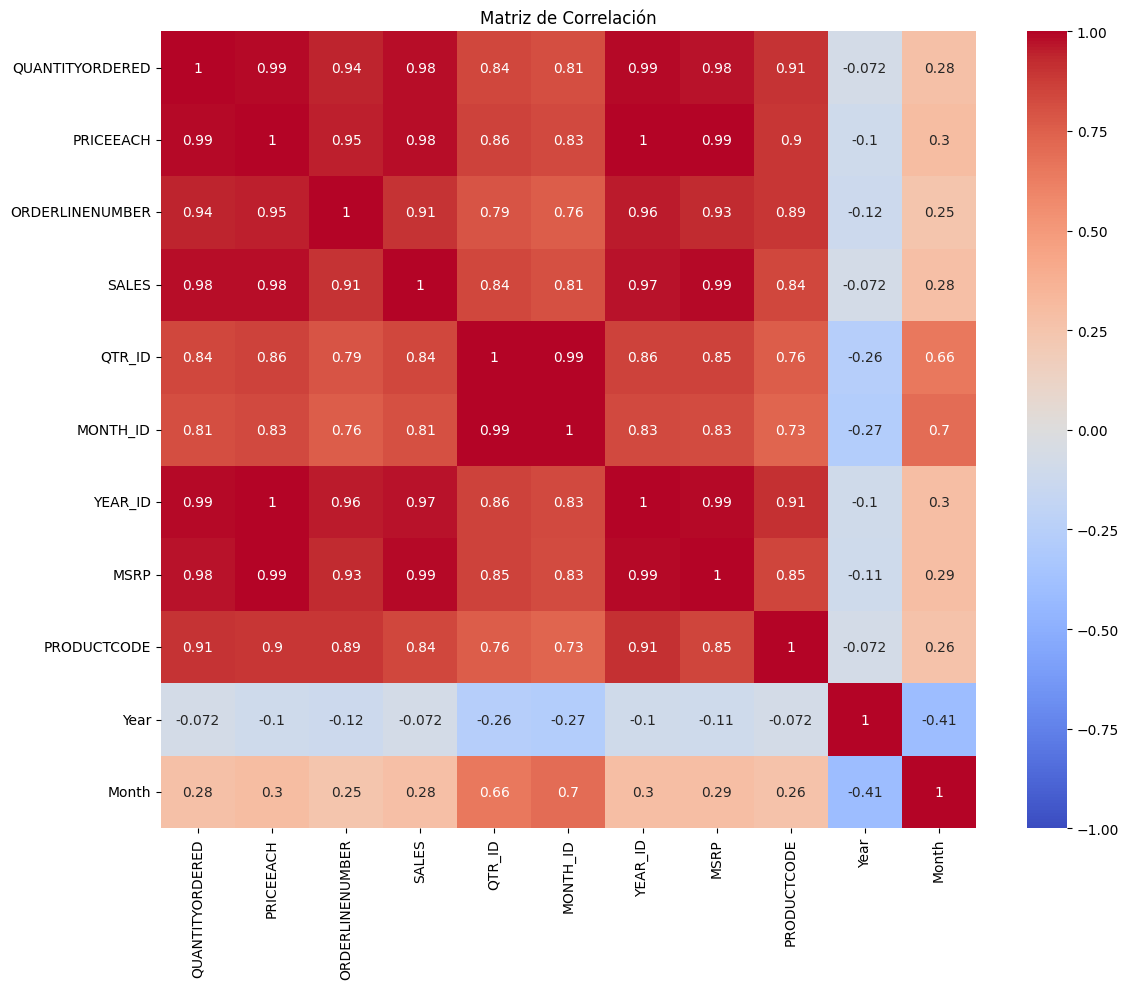

In [ ]:
# Crear un mapa de calor para esta matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.tight_layout()
plt.show()

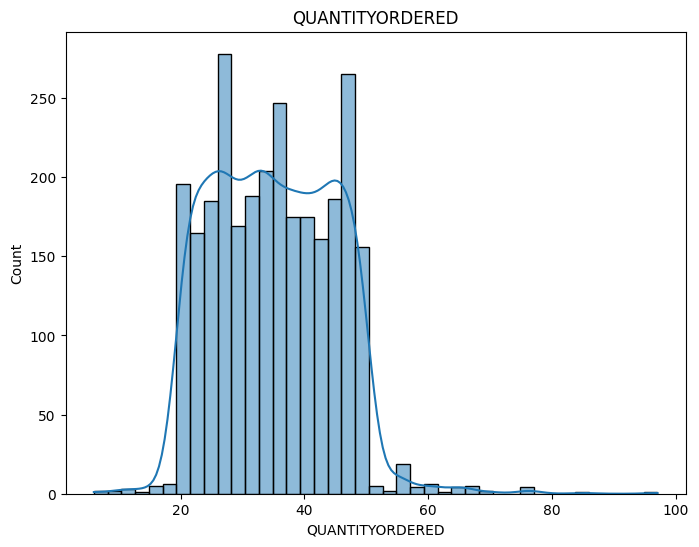

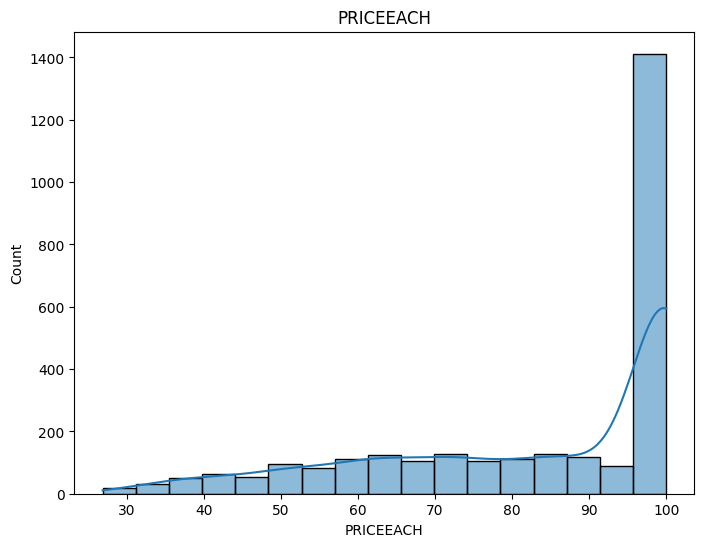

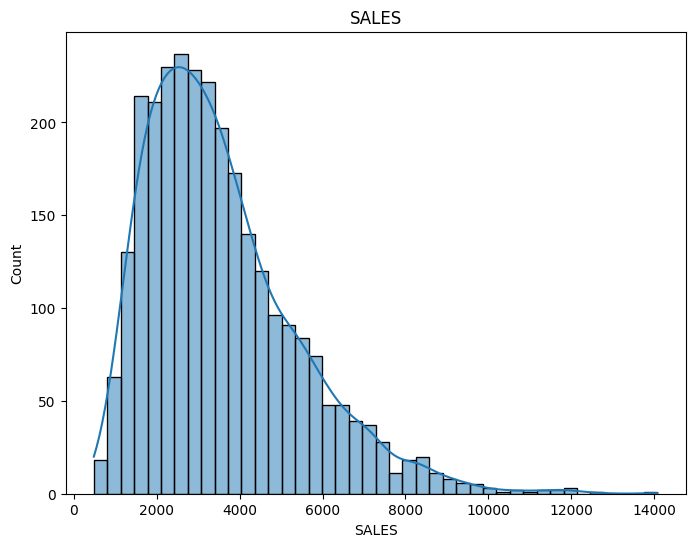

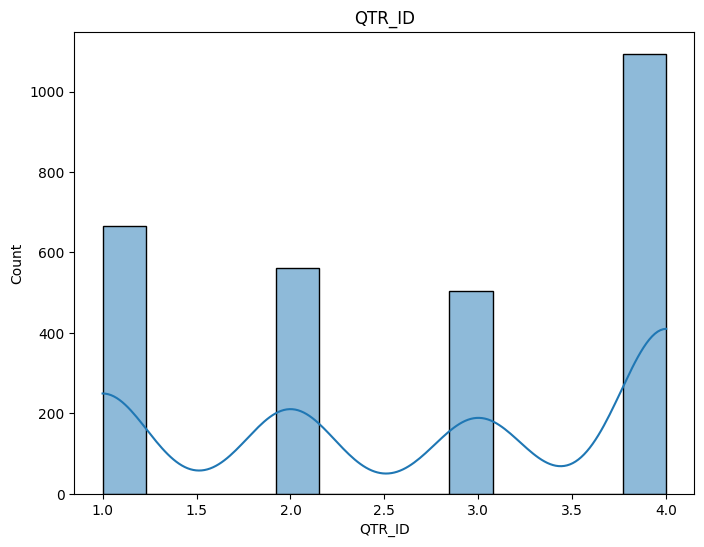

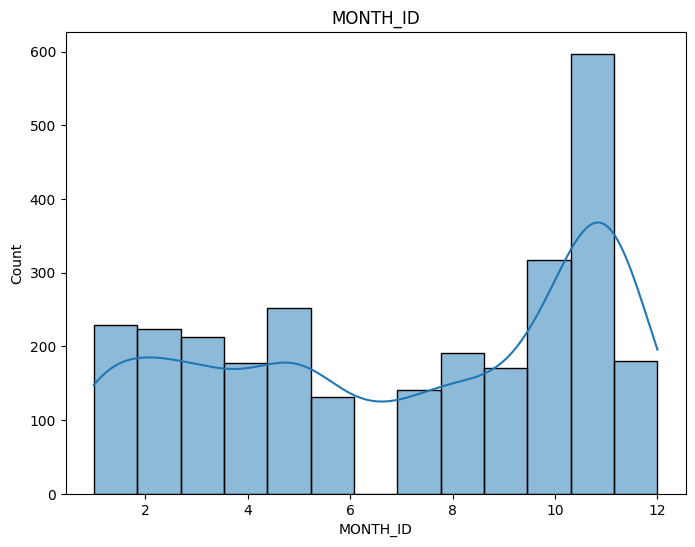

In [ ]:
# Selecciona solo las columnas numéricas y excluye 'ORDERLINENUMBER'
columns_to_plot = [col for col in datos.columns[:8]
                   if datos[col].dtype in ['float64', 'int64']
                   and col != 'ORDERLINENUMBER']

# Crea y muestra gráficos de distribución para cada columna seleccionada
for col_name in columns_to_plot:
    plt.figure(figsize=(8, 6))
    sns.histplot(datos[col_name], kde=True)
    plt.title(col_name)
    plt.show()

In [ ]:
# Seleccionar solo columnas numéricas
numeric_columns = [col for col in datos.columns[:8] if datos[col].dtype in ['float64', 'int64']]

# Crear el scatter matrix
fig = px.scatter_matrix(datos,
    dimensions=numeric_columns,
    color='MONTH_ID',
    opacity=0.7,  # Ajustar opacidad si es necesario
    title='Datos de ventas',
    width=1100,
    height=1100
)

fig.show()

### **Clustering espectral**

Es una técnica de aprendizaje automático no supervisado utilizada para agrupar datos basándose en las relaciones entre ellos. A diferencia de otros métodos de clustering, como K-Means, que trabajan directamente sobre las características de los datos, el Clustering Espectral se enfoca en la estructura de similitud entre los datos.

In [ ]:
datos = datos.drop(columns=['ORDERDATE'])

In [ ]:
datos = pd.get_dummies(datos, columns=['STATUS', 'PRODUCTLINE', 'COUNTRY', 'CONTACTFIRSTNAME'])

In [ ]:
# Usando la distancia euclidiana para calcular la matriz de similitud
similarity_matrix = pairwise_distances(datos, metric='euclidean')

In [ ]:
# Supongamos que quieres 3 clusters (puedes ajustar este número según tus necesidades)
n_clusters = 5

spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', n_neighbors=10)
labels = spectral.fit_predict(similarity_matrix)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_spectral.py:717: UserWarning:

The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.



El coeficiente de silueta promedio es: 0.5155417410462398


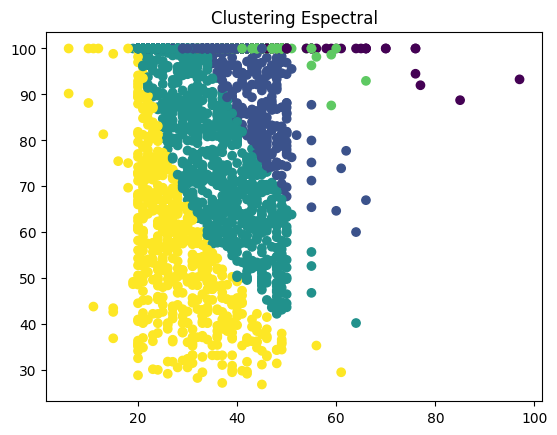

In [ ]:
# Parámetros iniciales
n_clusters = 5
affinity = 'nearest_neighbors'
n_neighbors = 10
gamma = 1.0
assign_labels = 'kmeans'

# Aplicar Clustering Espectral
clustering = SpectralClustering(n_clusters=n_clusters,
                                affinity=affinity,
                                n_neighbors=n_neighbors,
                                gamma=gamma,
                                assign_labels=assign_labels)

labels = clustering.fit_predict(datos)

# Evaluar con el coeficiente de silueta
silhouette_avg = silhouette_score(datos, labels)
print(f"El coeficiente de silueta promedio es: {silhouette_avg}")

# Visualización (asumiendo datos en 2D)
plt.scatter(datos.iloc[:, 0], datos.iloc[:, 1], c=labels)
plt.title('Clustering Espectral')
plt.show()

In [ ]:
datos['cluster'] = labels

In [ ]:
# Agrupar por cluster y calcular la media de cada característica
cluster_summary = datos.groupby('cluster').mean()
print(cluster_summary)

         QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER        SALES    QTR_ID  \
cluster                                                                       
0              46.371859  99.841859         5.527638  7983.625477  2.658291   
1              36.586538  95.412926         6.513736  4036.114245  2.719780   
2              33.202505  81.123330         6.713987  2675.535710  2.729645   
3              41.855586  99.928283         6.245232  5658.845695  2.760218   
4              28.082312  56.828546         6.458844  1516.001103  2.688266   

         MONTH_ID      YEAR_ID        MSRP  PRODUCTCODE  STATUS_Cancelled  \
cluster                                                                     
0        6.899497  2003.919598  154.291457    28.050251          0.010050   
1        7.103022  2003.815934  114.000000    49.769231          0.016484   
2        7.115866  2003.799582   88.784969    61.893528          0.028184   
3        7.228883  2003.801090  130.024523    39.618529      

In [ ]:
# Calcular los centroides aproximados en el espacio transformado
centroids_transformed = datos.groupby('cluster').mean()

In [ ]:
# Suponiendo que 'scaler' es tu objeto StandardScaler que utilizaste para escalar tus datos
scaler = StandardScaler().fit(centroids_transformed)
centroids_original = scaler.inverse_transform(centroids_transformed)

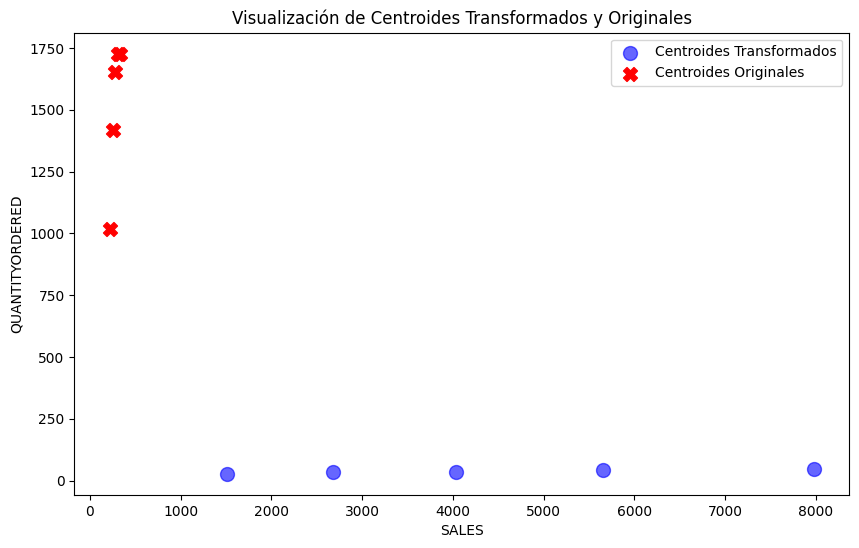

In [ ]:
plt.figure(figsize=(10, 6))

# Graficar los centroides transformados
plt.scatter(centroids_transformed['SALES'], centroids_transformed['QUANTITYORDERED'], color='blue', marker='o', s=100, alpha=0.6, label='Centroides Transformados')

# Graficar los centroides originales
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], color='red', marker='X', s=100, label='Centroides Originales')

plt.title('Visualización de Centroides Transformados y Originales')
plt.xlabel('SALES')
plt.ylabel('QUANTITYORDERED')
plt.legend()
plt.show()

In [ ]:
# Agregar una etiqueta (qué clúster) correspondiente a cada punto de datos
datos_cluster = pd.concat([datos, pd.DataFrame({'cluster':labels})], axis = 1)
datos_cluster

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,CONTACTFIRSTNAME_Adrian,CONTACTFIRSTNAME_Akiko,CONTACTFIRSTNAME_Allen,CONTACTFIRSTNAME_Ann,CONTACTFIRSTNAME_Anna,CONTACTFIRSTNAME_Annette,CONTACTFIRSTNAME_Arnold,CONTACTFIRSTNAME_Carine,CONTACTFIRSTNAME_Catherine,CONTACTFIRSTNAME_Christina,CONTACTFIRSTNAME_Dan,CONTACTFIRSTNAME_Daniel,CONTACTFIRSTNAME_Dean,CONTACTFIRSTNAME_Diego,CONTACTFIRSTNAME_Dominique,CONTACTFIRSTNAME_Eduardo,CONTACTFIRSTNAME_Elizabeth,CONTACTFIRSTNAME_Eric,CONTACTFIRSTNAME_Francisca,CONTACTFIRSTNAME_Frederique,CONTACTFIRSTNAME_Georg,CONTACTFIRSTNAME_Giovanni,CONTACTFIRSTNAME_Helen,CONTACTFIRSTNAME_Henriette,CONTACTFIRSTNAME_Jan,CONTACTFIRSTNAME_Janine,CONTACTFIRSTNAME_Jean,CONTACTFIRSTNAME_Jeff,CONTACTFIRSTNAME_Jesus,CONTACTFIRSTNAME_Jonas,CONTACTFIRSTNAME_Jose Pedro,CONTACTFIRSTNAME_Julie,CONTACTFIRSTNAME_Juri,CONTACTFIRSTNAME_Jytte,CONTACTFIRSTNAME_Kalle,CONTACTFIRSTNAME_Kee,CONTACTFIRSTNAME_Kwai,CONTACTFIRSTNAME_Kyung,CONTACTFIRSTNAME_Laurence,CONTACTFIRSTNAME_Leslie,CONTACTFIRSTNAME_Maria,CONTACTFIRSTNAME_Marie,CONTACTFIRSTNAME_Marta,CONTACTFIRSTNAME_Martine,CONTACTFIRSTNAME_Mart¡n,CONTACTFIRSTNAME_Mary,CONTACTFIRSTNAME_Matti,CONTACTFIRSTNAME_Maurizio,CONTACTFIRSTNAME_Michael,CONTACTFIRSTNAME_Miguel,CONTACTFIRSTNAME_Mory,CONTACTFIRSTNAME_Palle,CONTACTFIRSTNAME_Paolo,CONTACTFIRSTNAME_Pascale,CONTACTFIRSTNAME_Paul,CONTACTFIRSTNAME_Peter,CONTACTFIRSTNAME_Pirkko,CONTACTFIRSTNAME_Roland,CONTACTFIRSTNAME_Rosa,CONTACTFIRSTNAME_Sean,CONTACTFIRSTNAME_Steve,CONTACTFIRSTNAME_Sue,CONTACTFIRSTNAME_Thomas,CONTACTFIRSTNAME_Tony,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,cluster,cluster
0,30,95.70,2,2871.00,1,2,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
1,34,81.35,5,2765.90,2,5,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2
2,41,94.74,2,3884.34,3,7,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,45,83.26,6,3746.70,3,8,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,49,100.00,14,5205.27,4,10,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
assert len(datos) == len(labels), "El DataFrame 'datos' y 'labels' deben tener la misma longitud"

In [ ]:
datos_cluster = datos.copy()
datos_cluster['cluster'] = labels

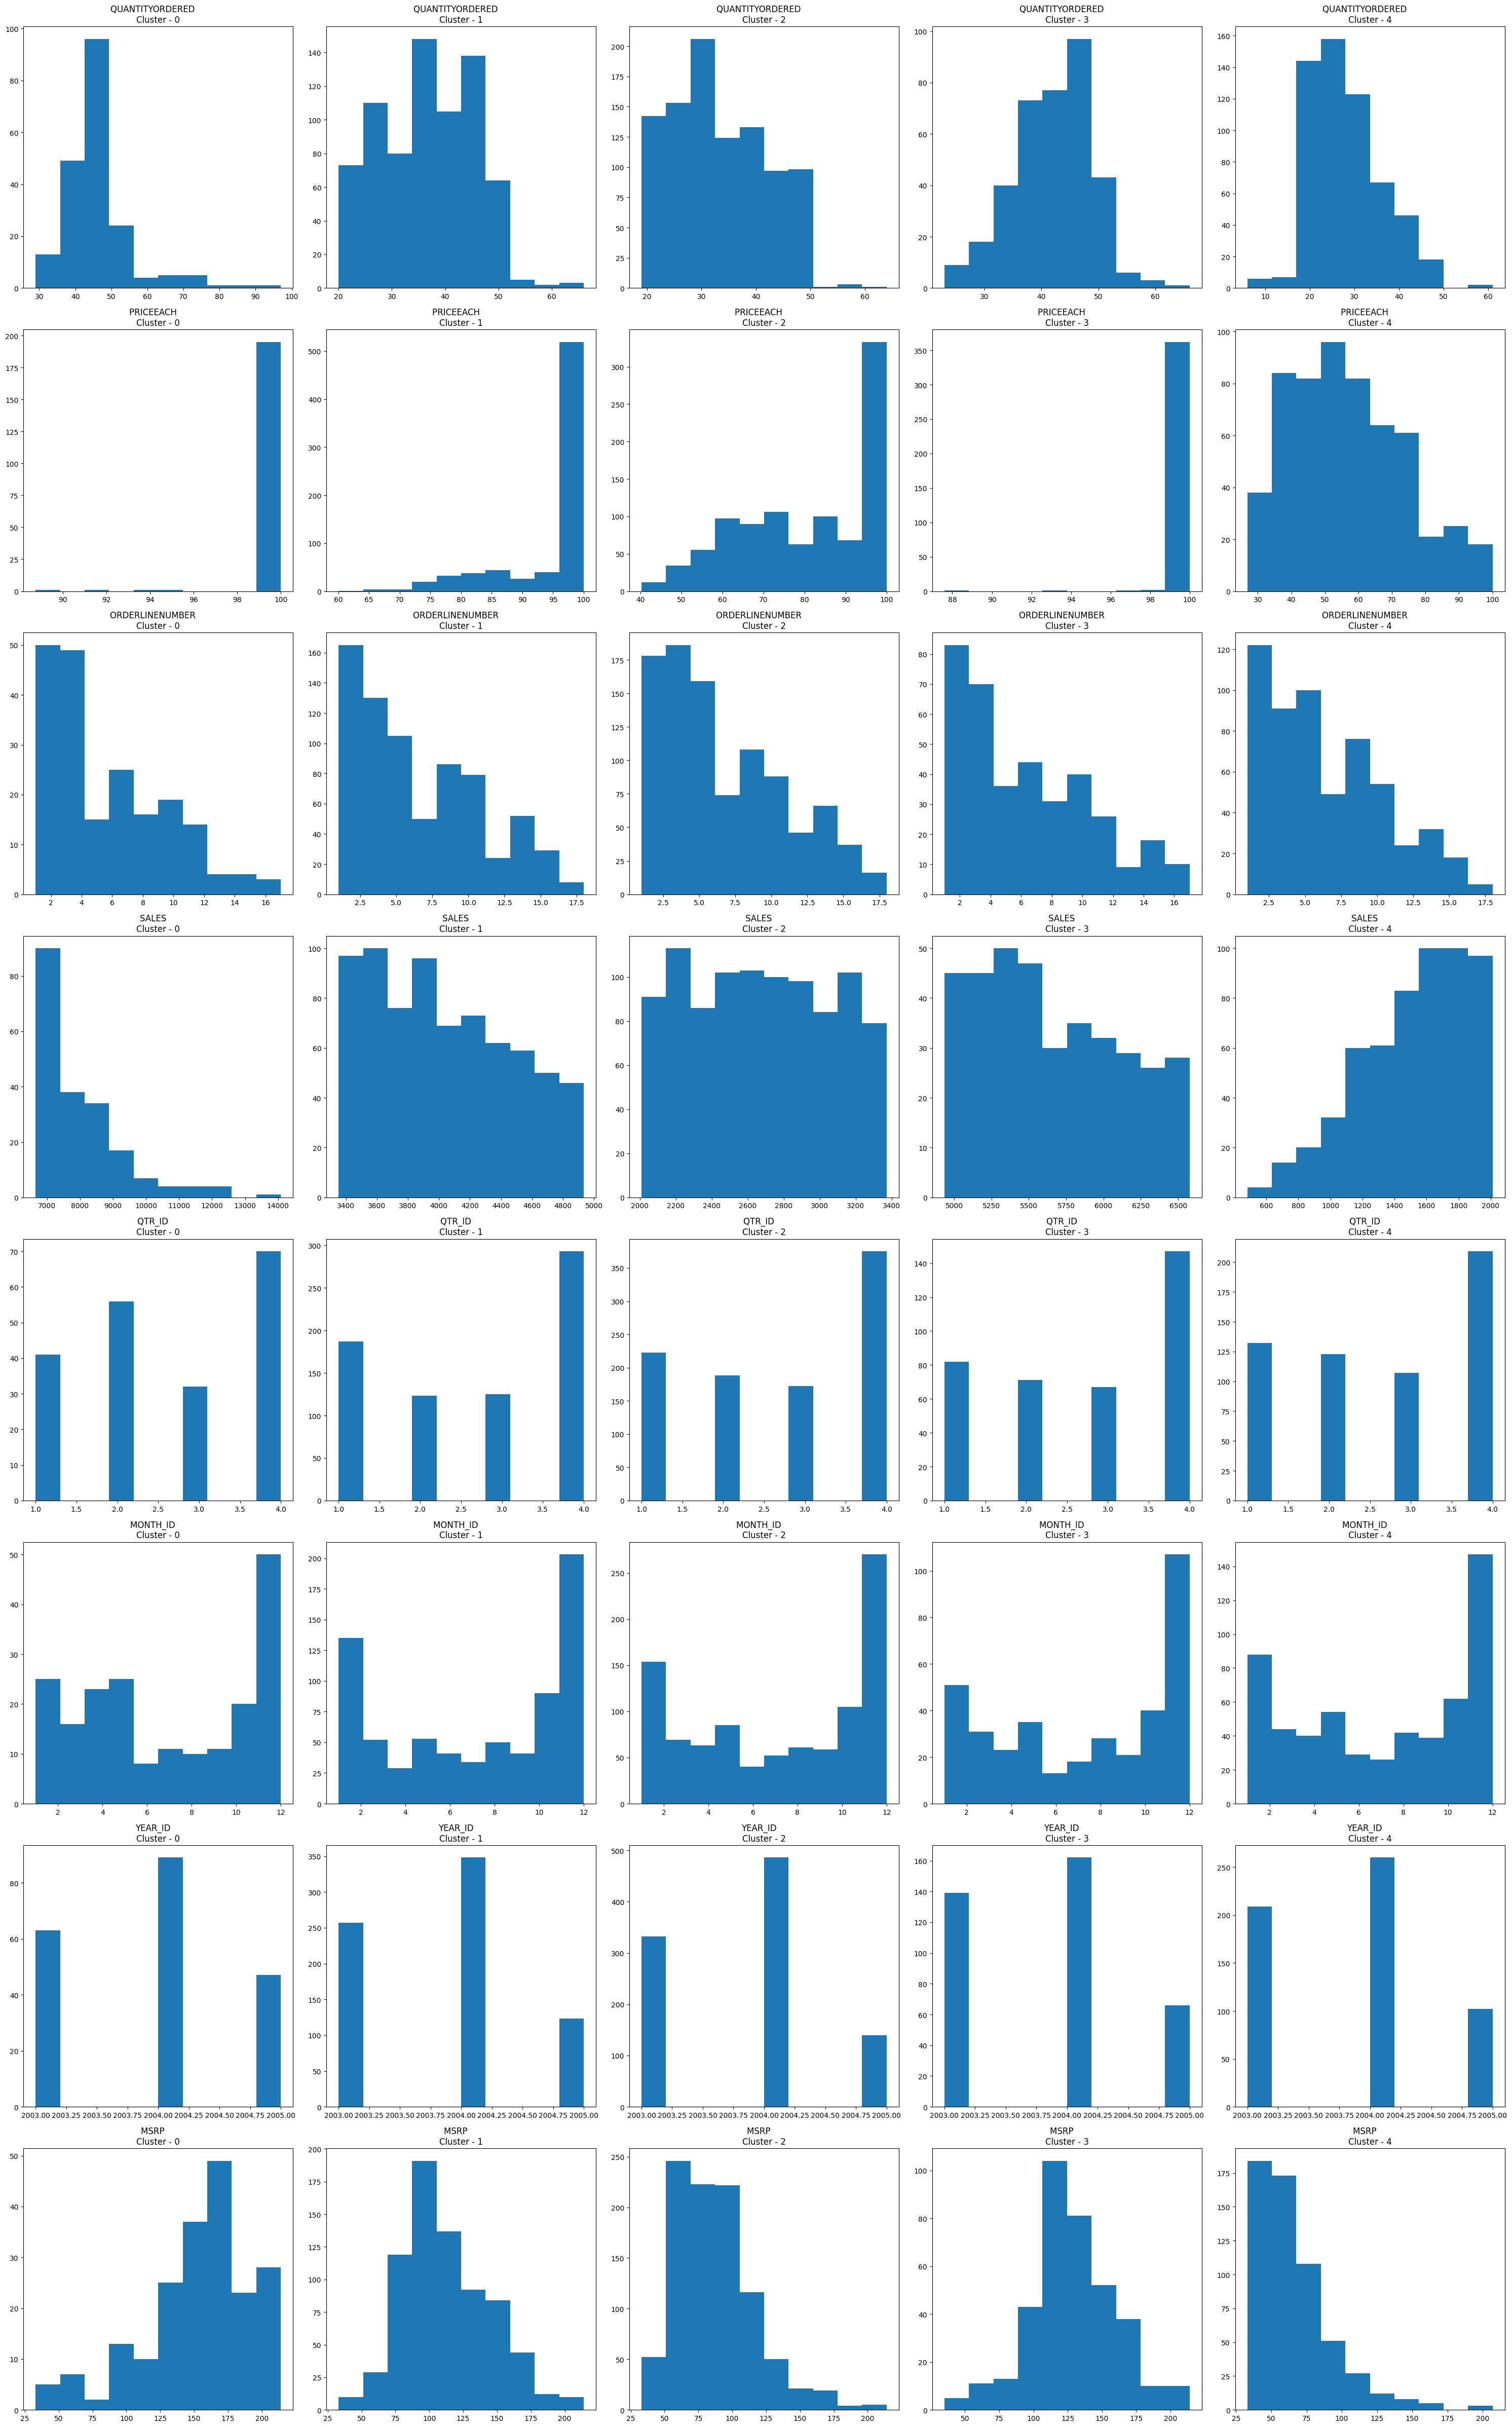

In [ ]:
# Visualización de cluster
n_clusters = 5
n_features = len(datos.columns[:8])
fig, axes = plt.subplots(n_features, n_clusters, figsize=(30, 6 * n_features))

for feature_idx, feature in enumerate(datos.columns[:8]):
    for cluster_idx in range(n_clusters):
        cluster_data = datos_cluster[datos_cluster['cluster'] == cluster_idx]
        axes[feature_idx, cluster_idx].hist(cluster_data[feature])
        axes[feature_idx, cluster_idx].set_title(f'{feature}    \nCluster - {cluster_idx}')

plt.tight_layout()
plt.show()

## **PCA**

El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica de reducción de dimensionalidad utilizada en estadísticas y aprendizaje automático. Es una herramienta poderosa para simplificar los datos complejos, destacando las características más importantes y reduciendo el número de variables a considerar.

In [ ]:
# Estandarizar los datos
scaler = StandardScaler()
datos_scaled = scaler.fit_transform(datos)

# Aplicar PCA y reducir a 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(datos_scaled)
principal_components

array([[ 0.6064566 ,  0.44315038],
       [ 0.06044358,  0.38901665],
       [ 1.36869591, -0.28164446],
       ...,
       [-2.11425689,  5.27602845],
       [-2.67864045,  1.75392134],
       [-2.2429355 ,  3.53241671]])

In [ ]:
# Convertir a DataFrame
df_pca = pd.DataFrame(data = principal_components, columns = ['Principal Component 1', 'Principal Component 2'])

# Si tienes etiquetas de clúster, puedes agregarlas al DataFrame
df_pca['Cluster'] = labels

print(df_pca.head())

   Principal Component 1  Principal Component 2  Cluster
0               0.606457               0.443150        2
1               0.060444               0.389017        2
2               1.368696              -0.281644        1
3               1.343458              -0.933551        1
4               1.522269              -1.544935        3


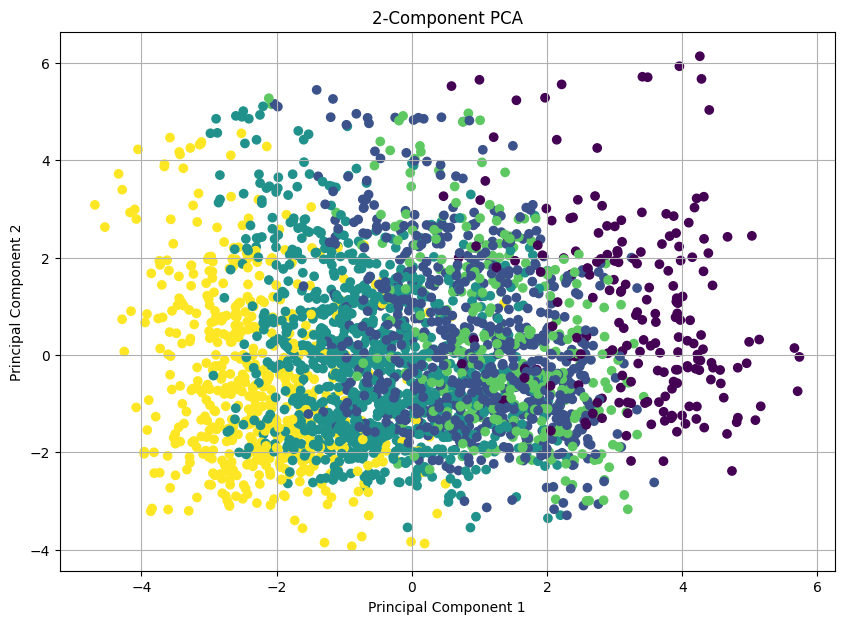

In [ ]:
plt.figure(figsize=(10, 7))

# Si tienes etiquetas de clúster, puedes usarlas para colorear los puntos
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels, cmap='viridis')
#plt.scatter(principal_components[:, 0], principal_components[:, 1]) (Optativo)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-Component PCA')
plt.grid(True)
plt.show()

In [ ]:
# Concatenar las etiquetas de clúster al DataFrame original
datos_con_clusters = pd.concat([datos, df_pca['Cluster']], axis=1)

print(datos_con_clusters.head())

   QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  MONTH_ID  \
0               30      95.70                2  2871.00       1         2   
1               34      81.35                5  2765.90       2         5   
2               41      94.74                2  3884.34       3         7   
3               45      83.26                6  3746.70       3         8   
4               49     100.00               14  5205.27       4        10   

   YEAR_ID  MSRP  PRODUCTCODE  STATUS_Cancelled  STATUS_Disputed  \
0     2003    95            0                 0                0   
1     2003    95            0                 0                0   
2     2003    95            0                 0                0   
3     2003    95            0                 0                0   
4     2003    95            0                 0                0   

   STATUS_In Process  STATUS_On Hold  STATUS_Resolved  STATUS_Shipped  \
0                  0               0                0  

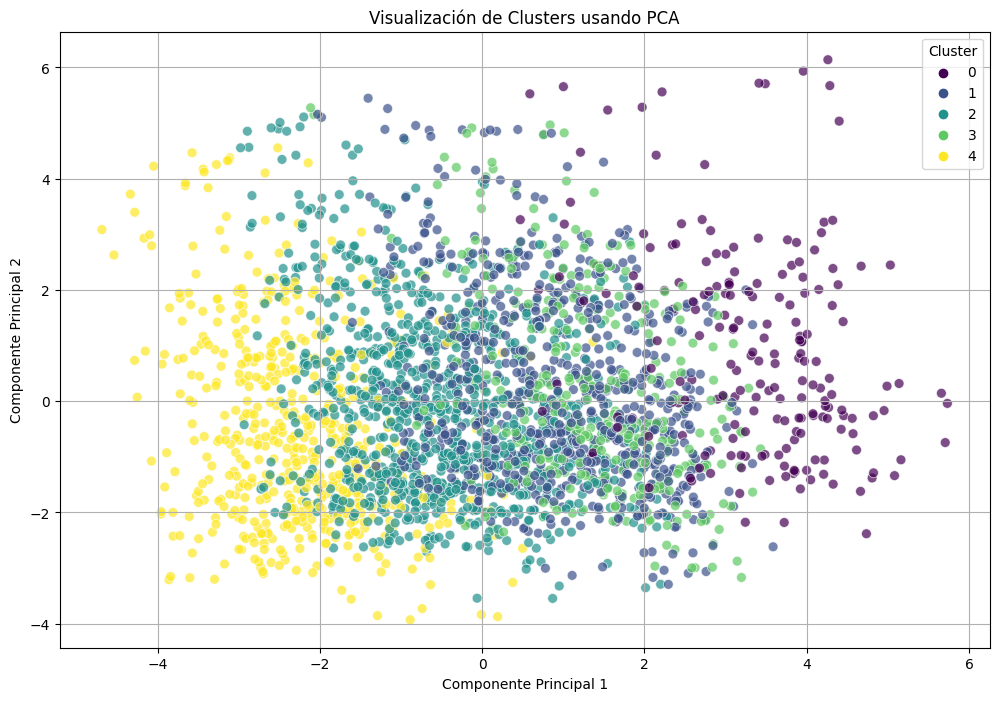

In [ ]:
# Asumiendo que df_pca contiene las dos componentes principales y la columna 'Cluster' con las etiquetas de clúster
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=50, alpha=0.7)
plt.title('Visualización de Clusters usando PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

## **AUTOENCODERS**

Los autoencoders son una clase de redes neuronales utilizadas en el aprendizaje no supervisado. Su objetivo principal es aprender una representación (codificación) eficiente de los datos de entrada, usualmente con el fin de reducir su dimensionalidad.

Codificador (Encoder): Esta parte de la red toma los datos de entrada y los transforma en una representación codificada (también conocida como representación latente o espacio latente). Esta representación suele tener una dimensionalidad menor que los datos de entrada, capturando así sus aspectos más importantes.

Decodificador (Decoder): El decodificador toma la representación codificada y trata de reconstruir los datos de entrada originales a partir de ella. La idea es que, al forzar a la red a aprender a reconstruir los datos de entrada desde una representación comprimida, esta representación retendrá las características más significativas de los datos.

Los autoencoders se entrenan minimizando una función de pérdida que mide la diferencia entre los datos de entrada originales y su reconstrucción. Son utilizados en tareas como reducción de dimensionalidad, eliminación de ruido (denoising), y en algunas aplicaciones de generación de datos.

Un aspecto clave de los autoencoders es que no están diseñados para clasificar datos, sino para aprender una representación de estos. Por lo tanto, son especialmente útiles en escenarios donde la comprensión o representación de los datos es más importante que la predicción.

In [ ]:
# Preproceso
scaler = MinMaxScaler()
datos_scaled = scaler.fit_transform(datos)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test = train_test_split(datos_scaled, test_size=0.2, random_state=42)

In [ ]:
# Tamaño de entrada
input_dim = datos.shape[1]

# Define el tamaño de la representación comprimida
encoding_dim = 32

# Arquitectura
input_layer = Input(shape=(input_dim,))

# Capa de codificación
# Se introdujo la capa Dropout para regularizar el modelo y reducir el riesgo de sobreajuste
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dropout(0.5)(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dropout(0.5)(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Capa de decodificación
decoded = Dense(64, activation='relu')(encoded)
decoded = Dropout(0.5)(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dropout(0.5)(decoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Compilación del modelo
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Entrenamiento del Autoencoders
history = autoencoder.fit(X_train, X_train,
                          epochs=500,  # Aumento de epochs
                          batch_size=256,
                          shuffle=True,
                          validation_data=(X_test, X_test))

Epoch 1/500
9/9 [==============================] - 8s 29ms/step - loss: 0.2299 - val_loss: 0.2229
Epoch 2/500
9/9 [==============================] - 0s 8ms/step - loss: 0.1880 - val_loss: 0.1508
Epoch 3/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0990 - val_loss: 0.0418
Epoch 4/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0494 - val_loss: 0.0380
Epoch 5/500
9/9 [==============================] - 0s 9ms/step - loss: 0.0433 - val_loss: 0.0382
Epoch 6/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0427 - val_loss: 0.0390
Epoch 7/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0414 - val_loss: 0.0374
Epoch 8/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0399 - val_loss: 0.0345
Epoch 9/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0383 - val_loss: 0.0329
Epoch 10/500
9/9 [==============================] - 0s 7ms/step - loss: 0.0370 - val_loss: 0.0322
Epoch 11/500
9/9 [==========

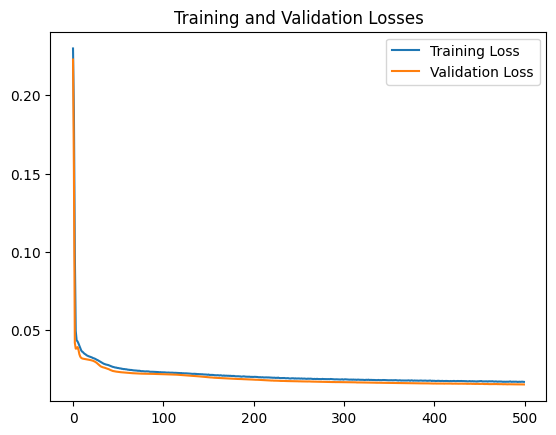

In [ ]:
# Visualización de la pérdida
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Losses')
plt.show()

In [ ]:
# Dividir datos en entrenamiento y prueba
X_train, X_test = train_test_split(datos, test_size=0.2, random_state=42)

In [ ]:
# Usa el autoencoder para obtener las reconstrucciones
decoded_data = autoencoder.predict(X_test)

18/18 [==============================] - 0s 2ms/step


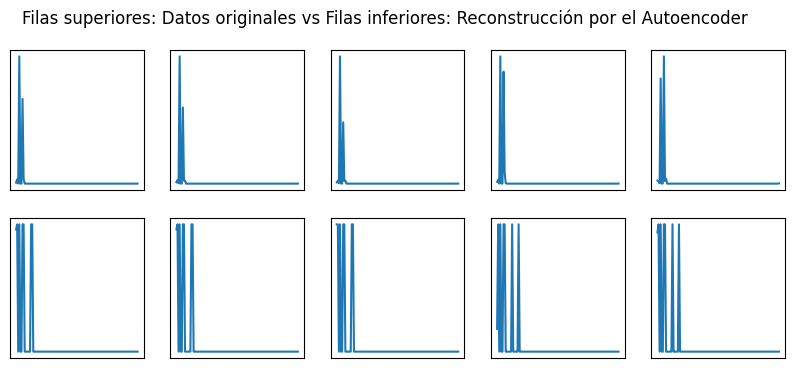

In [ ]:
n = 5  # Número de muestras aleatorias a visualizar
samples_to_visualize = np.random.choice(X_test.shape[0], n)

plt.figure(figsize=(10, 4))

for i, sample_idx in enumerate(samples_to_visualize):
    # Datos originales
    # Iloc para indexar
    ax = plt.subplot(2, n, i + 1)
    plt.plot(X_test.iloc[sample_idx])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.plot(decoded_data[sample_idx])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.suptitle("Filas superiores: Datos originales vs Filas inferiores: Reconstrucción por el Autoencoder")
plt.show()

In [ ]:
print(datos.head())

   QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  MONTH_ID  \
0               30      95.70                2  2871.00       1         2   
1               34      81.35                5  2765.90       2         5   
2               41      94.74                2  3884.34       3         7   
3               45      83.26                6  3746.70       3         8   
4               49     100.00               14  5205.27       4        10   

   YEAR_ID  MSRP  PRODUCTCODE  STATUS_Cancelled  STATUS_Disputed  \
0     2003    95            0                 0                0   
1     2003    95            0                 0                0   
2     2003    95            0                 0                0   
3     2003    95            0                 0                0   
4     2003    95            0                 0                0   

   STATUS_In Process  STATUS_On Hold  STATUS_Resolved  STATUS_Shipped  \
0                  0               0                0  

In [ ]:
datos

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,STATUS_Cancelled,STATUS_Disputed,STATUS_In Process,STATUS_On Hold,STATUS_Resolved,STATUS_Shipped,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,CONTACTFIRSTNAME_Adrian,CONTACTFIRSTNAME_Akiko,CONTACTFIRSTNAME_Allen,CONTACTFIRSTNAME_Ann,CONTACTFIRSTNAME_Anna,CONTACTFIRSTNAME_Annette,CONTACTFIRSTNAME_Arnold,CONTACTFIRSTNAME_Carine,CONTACTFIRSTNAME_Catherine,CONTACTFIRSTNAME_Christina,CONTACTFIRSTNAME_Dan,CONTACTFIRSTNAME_Daniel,CONTACTFIRSTNAME_Dean,CONTACTFIRSTNAME_Diego,CONTACTFIRSTNAME_Dominique,CONTACTFIRSTNAME_Eduardo,CONTACTFIRSTNAME_Elizabeth,CONTACTFIRSTNAME_Eric,CONTACTFIRSTNAME_Francisca,CONTACTFIRSTNAME_Frederique,CONTACTFIRSTNAME_Georg,CONTACTFIRSTNAME_Giovanni,CONTACTFIRSTNAME_Helen,CONTACTFIRSTNAME_Henriette,CONTACTFIRSTNAME_Jan,CONTACTFIRSTNAME_Janine,CONTACTFIRSTNAME_Jean,CONTACTFIRSTNAME_Jeff,CONTACTFIRSTNAME_Jesus,CONTACTFIRSTNAME_Jonas,CONTACTFIRSTNAME_Jose Pedro,CONTACTFIRSTNAME_Julie,CONTACTFIRSTNAME_Juri,CONTACTFIRSTNAME_Jytte,CONTACTFIRSTNAME_Kalle,CONTACTFIRSTNAME_Kee,CONTACTFIRSTNAME_Kwai,CONTACTFIRSTNAME_Kyung,CONTACTFIRSTNAME_Laurence,CONTACTFIRSTNAME_Leslie,CONTACTFIRSTNAME_Maria,CONTACTFIRSTNAME_Marie,CONTACTFIRSTNAME_Marta,CONTACTFIRSTNAME_Martine,CONTACTFIRSTNAME_Mart¡n,CONTACTFIRSTNAME_Mary,CONTACTFIRSTNAME_Matti,CONTACTFIRSTNAME_Maurizio,CONTACTFIRSTNAME_Michael,CONTACTFIRSTNAME_Miguel,CONTACTFIRSTNAME_Mory,CONTACTFIRSTNAME_Palle,CONTACTFIRSTNAME_Paolo,CONTACTFIRSTNAME_Pascale,CONTACTFIRSTNAME_Paul,CONTACTFIRSTNAME_Peter,CONTACTFIRSTNAME_Pirkko,CONTACTFIRSTNAME_Roland,CONTACTFIRSTNAME_Rosa,CONTACTFIRSTNAME_Sean,CONTACTFIRSTNAME_Steve,CONTACTFIRSTNAME_Sue,CONTACTFIRSTNAME_Thomas,CONTACTFIRSTNAME_Tony,CONTACTFIRSTNAME_Valarie,CONTACTFIRSTNAME_Veysel,CONTACTFIRSTNAME_Victoria,CONTACTFIRSTNAME_Violeta,CONTACTFIRSTNAME_Wendy,CONTACTFIRSTNAME_William,CONTACTFIRSTNAME_Wing C,CONTACTFIRSTNAME_Yoshi,cluster
0,30,95.70,2,2871.00,1,2,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
1,34,81.35,5,2765.90,2,5,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,41,94.74,2,3884.34,3,7,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,45,83.26,6,3746.70,3,8,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,49,100.00,14,5205.27,4,10,2003,95,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

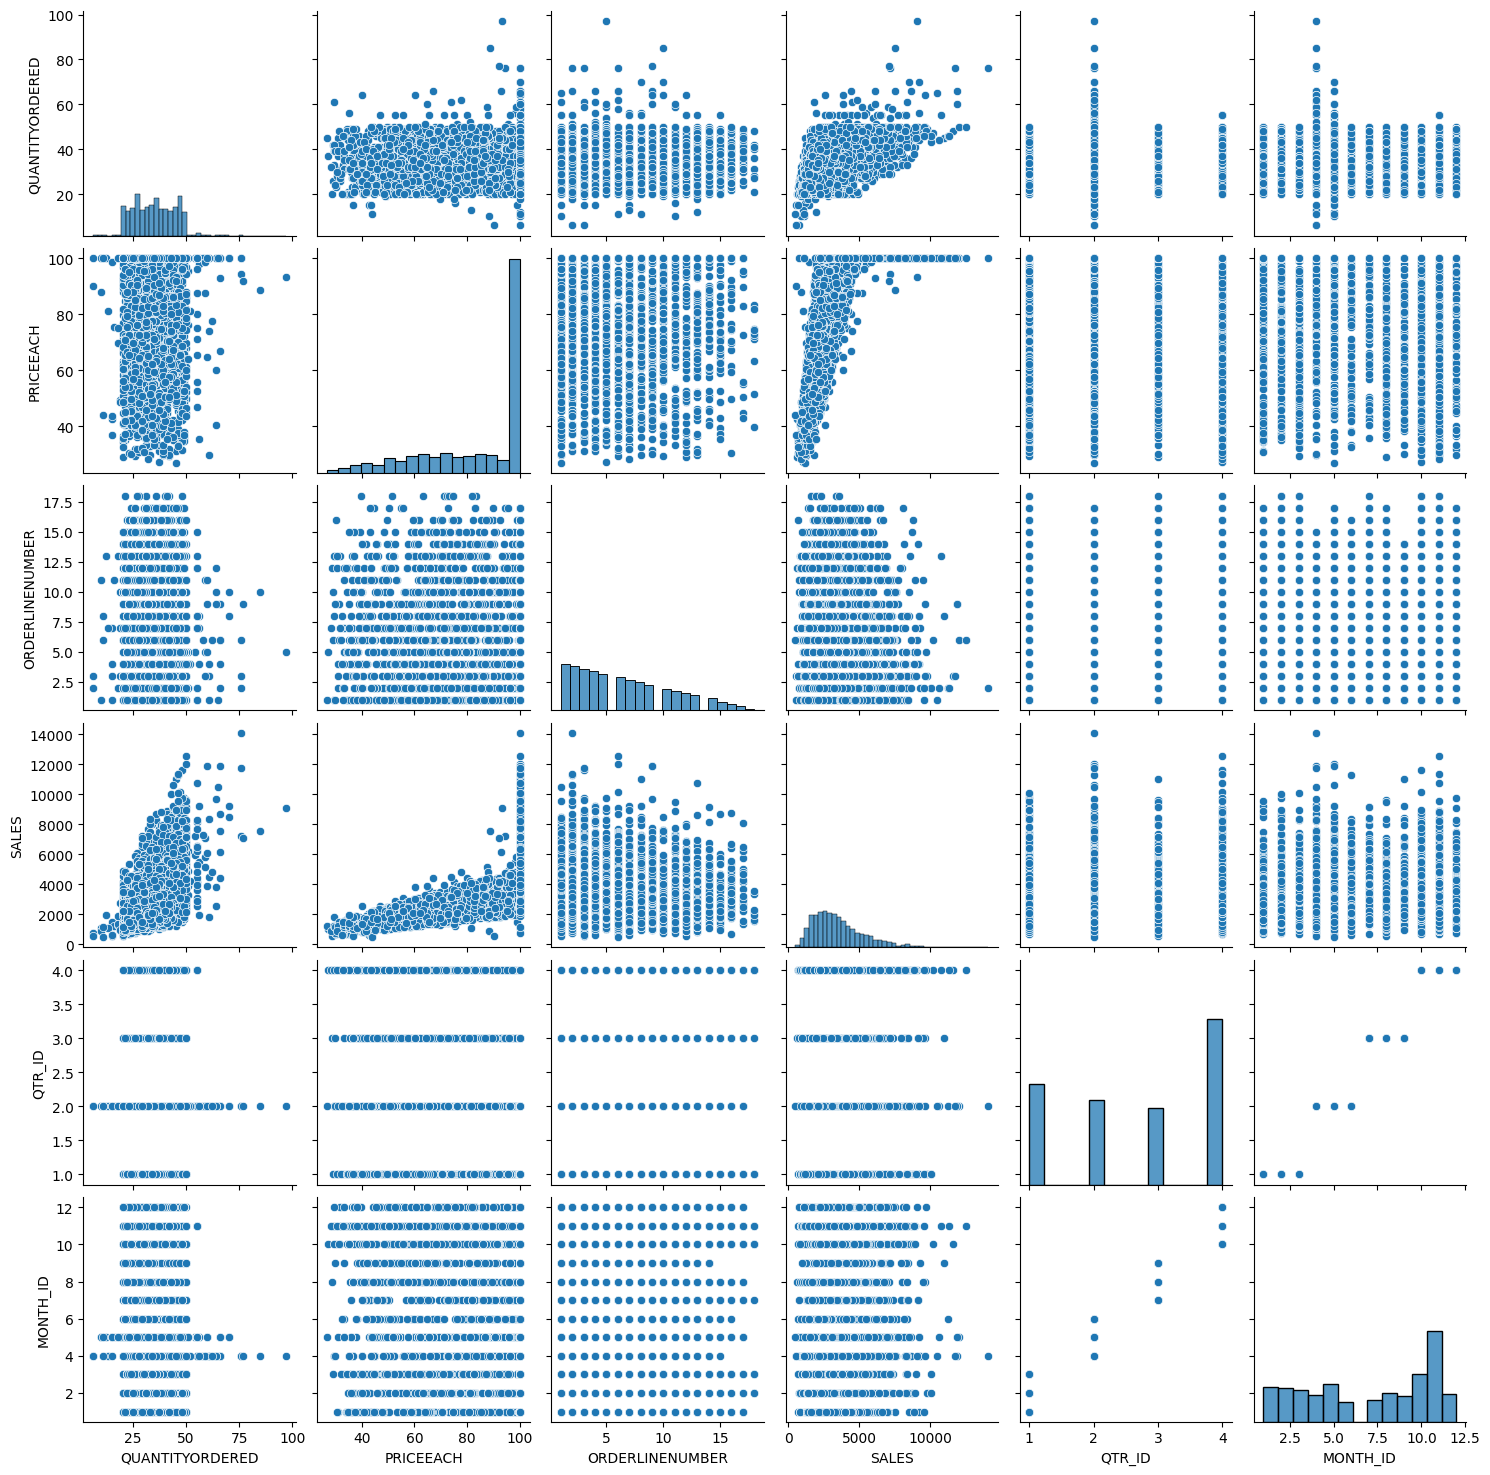

In [ ]:
# Asumiendo que solo quieres visualizar las primeras 4 columnas para evitar demasiados gráficos (Puede modificarse)
sns.pairplot(datos.iloc[:, :6])
plt.show()

In [ ]:
print(datos['SALES'].describe())

count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64


In [ ]:
# Visualización de gráfico por año
ventas_anuales = datos.groupby('YEAR_ID')['SALES'].sum().reset_index()
ventas_anuales['YEAR_ID'] = ventas_anuales['YEAR_ID'].astype(str)  # Convertir YEAR_ID a string
fig = px.bar(ventas_anuales, x='YEAR_ID', y='SALES', title='Ventas por Año', labels={'YEAR_ID': 'Año', 'SALES': 'Ventas'})
fig.show()

In [ ]:
# Obtener las columnas que representan países
columnas_paises = [col for col in datos.columns if 'COUNTRY_' in col]

# Crear un DataFrame para almacenar los resultados
ventas_por_pais = pd.DataFrame(columns=["COUNTRY", "SALES"])

# Calcular las ventas por país
for col in columnas_paises:
    pais = col.split('_')[1]  # Extraer el nombre del país de la columna
    total_ventas = datos[datos[col] == 1]['SALES'].sum()
    ventas_por_pais = ventas_por_pais.append({"COUNTRY": pais, "SALES": total_ventas}, ignore_index=True)

# Graficar con plotly
fig = px.bar(ventas_por_pais, x='COUNTRY', y='SALES', title='Ventas por País', labels={'COUNTRY': 'País', 'SALES': 'Ventas'})
fig.show()

<ipython-input-80-89ec4774236f>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-89ec4774236f>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-89ec4774236f>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-89ec4774236f>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-89ec4774236f>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-80-89ec4774236f>:11: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [ ]:
# Crear una función para convertir columnas one-hot de 'COUNTRY_' y 'PRODUCTLINE_' en columnas categóricas
def convert_one_hot_to_category(row, prefix):
    for col in datos.columns:
        if prefix in col and row[col] == 1:
            return col.split('_')[1]
    return None

# Convertir las columnas one-hot encoding en columnas categóricas
datos['PRODUCTLINE'] = datos.apply(lambda row: convert_one_hot_to_category(row, 'PRODUCTLINE_'), axis=1)
datos['COUNTRY'] = datos.apply(lambda row: convert_one_hot_to_category(row, 'COUNTRY_'), axis=1)

# Crear histogramas para cada tipo de producto mostrando la distribución de ventas por país
product_lines = datos['PRODUCTLINE'].unique()

for product in product_lines:
    subset_data = datos[datos['PRODUCTLINE'] == product]
    fig = px.histogram(subset_data, x='COUNTRY', title=f'Distribución de Ventas por País para {product}', labels={'COUNTRY': 'País', 'SALES': 'Ventas'})
    fig.show()

In [ ]:
# Crear una función para convertir columnas one-hot de 'CONTACTFIRSTNAME_' a una columna categórica
def convert_customer_to_category(row):
    for col in datos.columns:
        if 'CONTACTFIRSTNAME_' in col and row[col] == 1:
            return col.split('_')[1]
    return None

# Convertir las columnas one-hot encoding a una columna categórica "CUSTOMER"
datos['CUSTOMER'] = datos.apply(convert_customer_to_category, axis=1)

# Función para convertir columnas one-hot de 'PRODUCTLINE_' a una columna categórica
def convert_product_to_category(row):
    for col in datos.columns:
        if 'PRODUCTLINE_' in col and row[col] == 1:
            return col.split('_')[1]
    return None

# Filtrar las compras entre 2003 y 2005
subset_data = datos[(datos['YEAR_ID'] >= 2003) & (datos['YEAR_ID'] <= 2005)]

# Agrupar datos por cliente y producto
grouped_data = subset_data.groupby(['CUSTOMER', 'PRODUCTLINE'])['SALES'].sum().reset_index()

# Crear gráfico interactivo de burbuja
fig = px.scatter(grouped_data, x='CUSTOMER', y='PRODUCTLINE', size='SALES', color='SALES',
                 hover_name='CUSTOMER', size_max=60, title='Ventas por Cliente y Producto (2003-2005)')

fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# Agrupar la cantidad de productos vendidos por año y resetear el índice del DataFrame
productos_anuales = datos.groupby('YEAR_ID')['QUANTITYORDERED'].sum().reset_index()
productos_anuales['YEAR_ID'] = productos_anuales['YEAR_ID'].astype(str)  # Convertir YEAR_ID a string

# Crear el gráfico de líneas
fig = px.line(productos_anuales, x='YEAR_ID', y='QUANTITYORDERED', title='Cantidad de Productos Vendidos por Año', labels={'YEAR_ID': 'Año', 'QUANTITYORDERED': 'Cantidad Vendida'})

# Agregar puntos a cada año en la línea para destacar los valores exactos
fig.add_scatter(x=productos_anuales['YEAR_ID'], y=productos_anuales['QUANTITYORDERED'], mode='markers+text', text=productos_anuales['QUANTITYORDERED'], textposition='top center')

fig.show()